# 상관분석

## 개괄 이해

In [1]:
# 변수간 선형적 상관성을 확인하는 관계분석
# 피어슨, 스피어만, 캔달
# 상관계수 : 선형정도를 수치화  -1~ 1 사이의 값을 갖는다.  (공분산의 값의 범위: 무한대)
# 상관계수 계산 : 두 변수의 공분산 값을 각각의 표준편차의 곱으로 나눈 값으로,  공분산을 표준화한 개념으로 이해
# 공분산 : 편차와 편차의 곱에 기대치

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## Simple data 형성

In [2]:
# 랜덤한 데이터 형성 (시드 부여)
np.random.seed(2022)

x = np.random.randint(1,50,30)
y = np.random.randint(1,50,30)

print(x)
print(y)

[29 46 49 49 25 19 25 17 42 34 28 12 20 31 41 12 49 20 39  9 15 30 17 27
 12 31 34  3 17 16]
[24 38 18 24 22 38 20 13 46 27 13 15 33 14 14 43  1 46 30 24 38 22 12 44
 47  3  1 37 47 42]


## 데이터 시각화

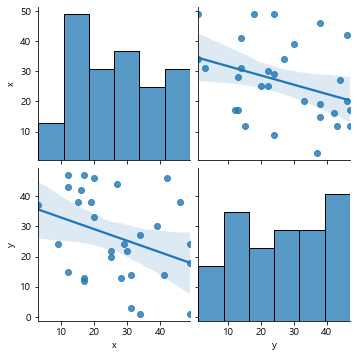

In [3]:
# 데이터 프레임 형성
sample = pd.DataFrame(list(zip(x,y)), columns=['x','y'])

# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.

sns.pairplot(sample, kind='reg')
plt.show()

## 공분산

In [4]:
# 하나씩 시행해보기

# mu = mean (공통적으로 적용)
mu_1 = np.sum(sample['x'])/len(sample['x'])
mu_2 = np.sum(sample['y'])/len(sample['y'])

# var = variance (잔차의 재곱합의 평균), 표준편차 = var의 제곱근
var_1 = np.sum([pow(i - mu_1, 2) for i in sample['x']]) / (len(sample['x']))
var_2 = np.sum([pow(i - mu_2, 2) for i in sample['y']]) / (len(sample['y']))
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

# 공분산 (표본상관계수를 구하는 것이 아니고 모집단으로 도출하므로 자유도는 0으로 설정하였음.)
covariance = sum( (sample['x'] - mu_1) * (sample['y'] - mu_2) ) / (len(sample['x']))

# COV(X,Y) : 모집단인 경우 (numpy와 비교, 자유도 0 설정은 ddof=0)
print(covariance)
print(np.cov(sample['x'],sample['y'], ddof=0)) # 공분산 행렬의 (1,2), (2,1)이 COV(X,Y)

-61.68666666666666
[[160.90666667 -61.68666667]
 [-61.68666667 200.91555556]]


# 피어슨 상관계수

## 가정

In [5]:
# 피어슨 상관분석
# 모수적 방법
# 가정 : 선형성, 정규성, 등분산성, 독립성

## 단순 계산하기 

In [6]:
# 상관계수 :  공분산 값을 각각의 표준편차의 곱으로 나눈 값
correlation = covariance / (std_1 * std_2)

# 피어슨 상관계수
print(correlation)

-0.34308166001608753


## scipy라이브러리를 활용 계산

In [7]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr

# 귀무가설 : '두 데이터의 상관계수가 0이다.(독립)'로 설정되어 있음.
# 대립가설 : 두 데이터의 상관계수가 0이 아니다.

pearsonr(sample['x'], sample['y'])

(-0.3430816600160875, 0.0634428569239739)

In [8]:
# 함수화 시행
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(sample['x'], sample['y'], True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(sample['x'], sample['y'], False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 160.907, COV(Y,Y) = 200.916(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : -61.687
모집단 data에 대한 피어슨 상관계수 값 : -0.343
Scipy로 구한 피어슨 상관계수는 -0.343입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 6.343999999999999%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 166.455, COV(y,y) = 207.844(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -63.814
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.343
Scipy로 구한 피어슨 상관계수는 -0.343입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 6.343999999999999%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


# 스피어만 상관계수

In [9]:
# 주로 명목형 변수에서 사용
# 비모수적 방법


In [10]:
# 랜덤한 데이터 형성 (시드 부여)
np.random.seed(2022)

x1 = np.random.randint(1,20,10)
y1 = np.random.randint(1,20,10)

print('x1 :',x1)
print('y1 :',y1)

sample1 = pd.DataFrame(list(zip(x1,y1)), columns=['x','y'])
print('\nsmaple1 dataframe은 다음과 같습니다.')
sample1

x1 : [14 17 18 18 17 19 17 10  2 12]
y1 : [ 9 12 17  7  9 15 17 12  2  3]

smaple1 dataframe은 다음과 같습니다.


,x,y
0,14,9
1,17,12
2,18,17
3,18,7
4,17,9
5,19,15
6,17,17
7,10,12
8,2,2
9,12,3


## 단순계산

In [11]:
sample1['rank_x'] = pd.DataFrame(sample1['x'].rank())
sample1['rank_y'] = pd.DataFrame(sample1['y'].rank())
sample1['diff'] = sample1['rank_x'] - sample1['rank_y']
sample1['d^2'] = sample1['diff'] ** 2

sample1

,x,y,rank_x,rank_y,diff,d^2
0,14,9,4.0,4.5,-0.5,0.25
1,17,12,6.0,6.5,-0.5,0.25
2,18,17,8.5,9.5,-1.0,1.00
3,18,7,8.5,3.0,5.5,30.25
4,17,9,6.0,4.5,1.5,2.25
5,19,15,10.0,8.0,2.0,4.00
6,17,17,6.0,9.5,-3.5,12.25
7,10,12,2.0,6.5,-4.5,20.25
8,2,2,1.0,1.0,0.0,0.00
9,12,3,3.0,2.0,1.0,1.00


In [12]:
n = len(sample1['d^2'])
sq_distance = 6 * sample1['d^2'].sum()
spearman = 1 - sq_distance / (n * ( n ** 2 - 1))
spearman

0.5666666666666667

## scipy 활용

In [13]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)

from scipy.stats import spearmanr

spearmanr(sample1['x'], sample1['y'])

SpearmanrResult(correlation=0.5559113444061977, pvalue=0.09519504230496476)

In [14]:
sample1[{'x','y'}].corr(method='spearman')

,x,y
x,1.000000,0.555911
y,0.555911,1.000000


In [15]:
# sub1 = pd.DataFrame(sample1['x'].sort_values().values).rank(method='min', ascending=True)
# sub2 = pd.DataFrame(sample1['y'].sort_values().values).rank(method='min', ascending=True)

# ranked = pd.concat((sub1,sub2), axis=1)
# ranked.columns = ['ranked_x1','ranked_y1']
# ranked

# 켄달 상관계수

In [16]:
# 비모수적 방법

## 단순 계산 

In [17]:
from scipy.stats import kendalltau

X = [12, 2, 1, 11, 3]
Y = [1, 4, 7, 2, 0]

print(kendalltau(X,Y))

# 데이터 프레임 형성 (x, y + x, y의 rank)
kendal_df = pd.DataFrame(list(zip(X,Y)), columns=['x','y'])
kendal_df
kendal_df['x_rank'] = kendal_df['x'].rank()
kendal_df['y_rank'] = kendal_df['y'].rank()
kendal_df

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)


,x,y,x_rank,y_rank
0,12,1,5.0,2.0
1,2,4,2.0,4.0
2,1,7,1.0,5.0
3,11,2,4.0,3.0
4,3,0,3.0,1.0


In [18]:
# x의 rank를 기준으로 재정렬
sort_kendal = kendal_df.sort_values(by='x_rank').reset_index()
sort_kendal.drop(columns='index', inplace=True)
sort_kendal

,x,y,x_rank,y_rank
0,1,7,1.0,5.0
1,2,4,2.0,4.0
2,3,0,3.0,1.0
3,11,2,4.0,3.0
4,12,1,5.0,2.0


In [19]:
s = []
for i in range(4):
    if sort_kendal['y_rank'][i] < sort_kendal['y_rank'][i+1] :
        s.append('upward')
    else:
        s.append('downward')


sort_kendal = pd.concat([sort_kendal, pd.DataFrame(s, columns=['direction'])], axis=1)
sort_kendal

,x,y,x_rank,y_rank,direction
0,1,7,1.0,5.0,downward
1,2,4,2.0,4.0,downward
2,3,0,3.0,1.0,upward
3,11,2,4.0,3.0,downward
4,12,1,5.0,2.0,NaN


In [20]:
s

['downward', 'downward', 'upward', 'downward']

In [21]:
C = [0, 0, 1, 0]
D = [2, 1, 0, 1]

kendal = pd.concat([sort_kendal, pd.DataFrame(list(zip(C,D)), columns=['c','d'])], axis=1)
kendal

c = kendal['c'].sum()
d = kendal['d'].sum()

print(f'kendal 상관계수의 값은 (c-d)/(c+d)입니다. 즉 {(c-d)/(c+d)}로 도출됩니다.')

kendal 상관계수의 값은 (c-d)/(c+d)입니다. 즉 -0.6로 도출됩니다.


# 실습 (데이터 불러오기)

In [22]:
# 판다스 부분에서 했었던 데이터 불러오기
# 앞에서 실습한 파일 : crime_list.csv 사용

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


## 공분산

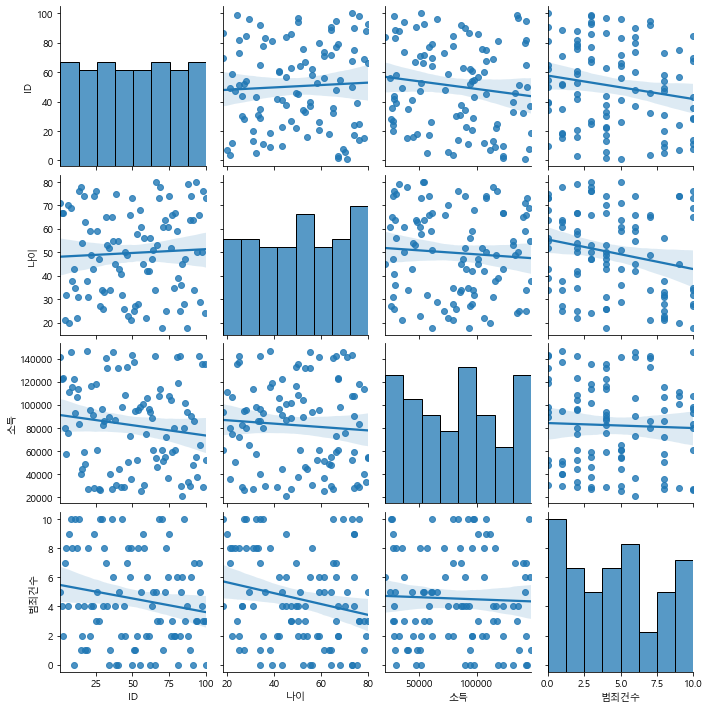

In [23]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(crime_list, kind='reg')
plt.show()

## 피어슨 상관 계수

### 단순계산 

In [24]:
# 하나씩 시행해보기
# 변수 지정, 소득과 범죄건수
x1 = crime_list['나이']
x2 = crime_list['범죄건수']

# 만약 표본상관계수를 도출하게 된다면 (n-1로 또 나눠주어야 함)
# mu = mean (공통적으로 적용)
mu_1 = np.sum(x1)/len(x1)
mu_2 = np.sum(x2)/len(x2)
# 분산을 구하는 부분에서도 모분산 추정이므로 자유도 1 설정
var_1 = np.sum([pow(i - mu_1, 2) for i in x1]) / (len(x1) - 1)
var_2 = np.sum([pow(i - mu_2, 2) for i in x2]) / (len(x2) - 1)
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

covariance_ddof = sum( (x1 - mu_1) * (x2 - mu_2) ) / (len(x1) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2)

# COV(X,Y) : 표본인 경우 (numpy와 비교)
print(covariance_ddof)
print(np.cov(x1,x2))
# 피어슨 상관계수
print(correlation_ddof)

-12.521818181818178
[[335.82414141 -12.52181818]
 [-12.52181818   9.92767677]]
-0.21686407922793227


### scipy라이브러리를 활용

In [25]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr

# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(x1, x2)

# 유의확률(p-value) 값이  유의수준(0.05)보다 작으면 귀무가설 기각- 대립가설 채택


(-0.21686407922793235, 0.03021676864226609)

In [26]:
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(x1, x2, True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(x1, x2, False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 332.466, COV(Y,Y) = 9.828(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : -12.397
모집단 data에 대한 피어슨 상관계수 값 : -0.217
Scipy로 구한 피어슨 상관계수는 -0.217입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 3.0220000000000002%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 335.824, COV(y,y) = 9.928(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -12.522
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.217
Scipy로 구한 피어슨 상관계수는 -0.217입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 3.0220000000000002%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


# heatmap

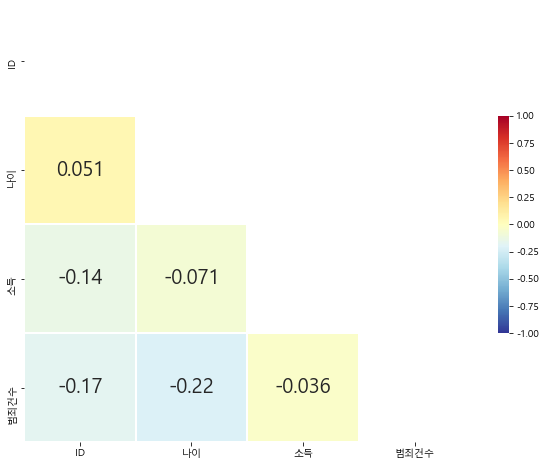

In [27]:
# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
        method_option (str, optional): [correlation을 도출하는 방식 선택]. Defaults to 'pearson' in addition, there are other options ('spearman', 'kendall').
        
    """
    # 라이브러리 호출
    
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # heatmap 그리기
    
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(10,8))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, vmin=-1, vmax=1,
                annot_kws={"size": 20}, linewidths=.20, mask=mask_ut)
   
   
    plt.show()

# 함수 사용
corr_heatmap(crime_list)